[https://scipy.github.io/old-wiki/pages/Cookbook/LinearClassification.html](https://scipy.github.io/old-wiki/pages/Cookbook/LinearClassification.html)

vector of max weights [-0.02153031 -0.07918534  0.07325388  0.01874012]


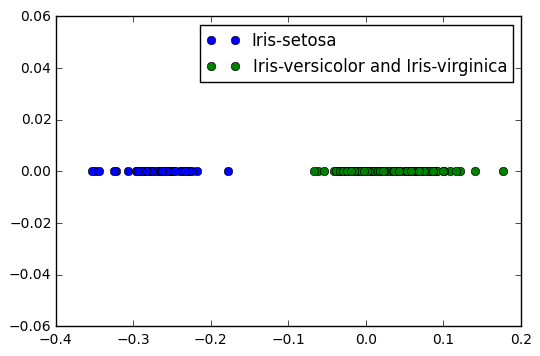

In [2]:
%matplotlib inline

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
 
def read_data():
    f=open("/Users/manishrai/Desktop/iris.txt", 'r')
    lines=[line.strip() for line in f.readlines()]
    f.close()
 
    lines=[line.split(",") for line in lines if line]
 
    class1=np.array([line[:4] for line in lines if line[-1]=="Iris-setosa"], dtype=np.float)

    class2=np.array([line[:4] for line in lines if line[-1]!="Iris-setosa"], dtype=np.float)

    return class1, class2
  
def main():

    class1, class2=read_data()

    mean1=np.mean(class1, axis=0)
    mean2=np.mean(class2, axis=0)
 
    #calculate variance within class
    Sw=np.dot((class1-mean1).T, (class1-mean1))+np.dot((class2-mean2).T, (class2-mean2))

    #calculate weights which maximize linear separation
    w=np.dot(np.linalg.inv(Sw), (mean2-mean1))

    print "vector of max weights", w
    #projection of classes on 1D space
    plt.plot(np.dot(class1, w), [0]*class1.shape[0], "bo", label="Iris-setosa")
    plt.plot(np.dot(class2, w), [0]*class2.shape[0], "go", label="Iris-versicolor and Iris-virginica")
    plt.legend()
  
    plt.show()
 
main()


In [3]:
!pwd

/Users/manishrai/Desktop/DSMLAI/Artificial_Intelligence/MachineLearning_Studies/res


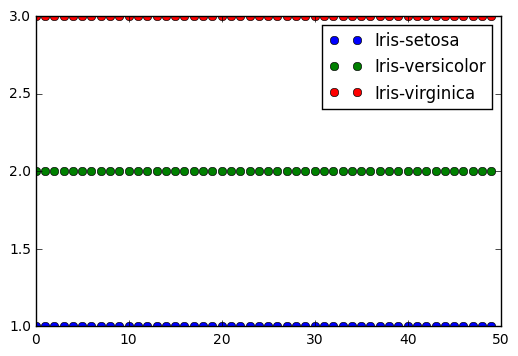

number of misclassifications [ 3.] assigned labels to data points [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math

def read_data():
    f=open("/Users/manishrai/Desktop/iris.txt", 'r')
    lines=[line.strip() for line in f.readlines()]
    f.close()

    lines=[line.split(",") for line in lines if line]

    data=np.array([line[:4] for line in lines if line], dtype=np.float) 

    class1=np.array([line[:4] for line in lines if line[-1]=="Iris-setosa"], dtype=np.float)

    class2=np.array([line[:4] for line in lines if line[-1]=="Iris-virginica"], dtype=np.float)

    class3=np.array([line[:4] for line in lines if line[-1]=="Iris-versicolor"], dtype=np.float)

    #list of class labels
    labels=[]
    for line in lines:
        strt=line.pop()
        labels.append(strt)
    #create array of labels
    labels=[line.split(",") for line in labels if line]
    t=np.zeros(shape=(150, 3))
    #create target vector encoded according to 1-of-K scheme
    for i in xrange(len(data)):
        if labels[i]==["Iris-setosa"]: t[i][0]=1
        elif labels[i]==["Iris-versicolor"]: t[i][1]=1
        elif labels[i]==["Iris-virginica"]: t[i][2]=1
  
    return class1, class2, class3, data, t

def gaussian(x, mean, cov):
    xm=np.reshape((x-mean), (-1, 1))
    px=1/(math.pow(2.0*math.pi, 2))*1/math.sqrt(np.linalg.det(cov))*math.exp(-(np.dot(np.dot(xm.T, np.linalg.inv(cov)), xm))/2)
    return px

def main():
    class1, class2, class3, data, t=read_data()
 
    count=np.zeros(shape=(150,1))
    t_assigned=np.zeros(shape=(150, 3))
    cov=np.zeros(shape=(3, 4, 4))
    mean=np.zeros(shape=(3, 4))

    #compute means for each class
    mean1=class1.mean(axis=0)
    mean2=class2.mean(axis=0)
    mean3=class3.mean(axis=0)
    #compute covariance matrices, such that the columns are variables and rows are observations of variables
    cov1=np.cov(class1, rowvar=0)
    cov2=np.cov(class2, rowvar=0)
    cov3=np.cov(class3, rowvar=0)
  
    #compute gaussian likelihood functions p(x|Ck) for each class
    for i in xrange(len(data)):
        px1=(1/3.0)*gaussian(data[i], mean1, cov1)
        px2=(1/3.0)*gaussian(data[i], mean2, cov2)
        px3=(1/3.0)*gaussian(data[i], mean3, cov3)
        m=np.max([px1, px2, px3])
        #compute posterior probability p(Ck|x) assuming that p(x|Ck) is gaussian and the entire expression is wrapped by sigmoid function 
        pc1=((math.exp(px1)*math.exp(-m))*math.exp(m))/((math.exp(px2)*math.exp(-m)+math.exp(px3)*math.exp(-m))*math.exp(m))
        pc2=((math.exp(px2)*math.exp(-m))*math.exp(m))/((math.exp(px1)*math.exp(-m)+math.exp(px3)*math.exp(-m))*math.exp(m))
        pc3=((math.exp(px3)*math.exp(-m))*math.exp(m))/((math.exp(px1)*math.exp(-m)+math.exp(px2)*math.exp(-m))*math.exp(m))
        #assign p(Ck|x)=1 if p(Ck|x)>>p(Cj|x) for all j!=k
        if pc1>pc2 and pc1>pc3: t_assigned[i][0]=1
        elif pc3>pc1 and pc3>pc2: t_assigned[i][1]=1
        elif pc2>pc1 and pc2>pc3: t_assigned[i][2]=1
    #count the number of misclassifications
        for j in xrange(3):
            if t[i][j]-t_assigned[i][j]!=0: count[i]=1
    
    cov=[cov1, cov2, cov3]
    mean=[mean1, mean2, mean3]
 
    t1=np.zeros(shape=(len(class1), 1))
    t2=np.zeros(shape=(len(class2), 1))
    t3=np.zeros(shape=(len(class3), 1))
    for i in xrange(len(data)):
        for j in xrange(len(class1)):
            if t_assigned[i][0]==1: t1[j]=1
            elif t_assigned[i][1]==1: t2[j]=2
            elif t_assigned[i][2]==1: t3[j]=3
 
    plt.plot(t1, "bo", label="Iris-setosa")
    plt.plot(t2, "go", label="Iris-versicolor")
    plt.plot(t3, "ro", label="Iris-virginica")
    plt.legend()
    plt.show()
   
    print "number of misclassifications", sum(count), "assigned labels to data points", t_assigned, "target data", t

main()
